# 1. Problem Statement:

Perusahaan Dream Housing Finance menangani semua jenis pinjaman rumah. Mereka hadir di semua wilayah perkotaan, semi perkotaan dan pedesaan. Pelanggan pertama-tama mengajukan pinjaman rumah dan setelah itu perusahaan memvalidasi kelayakan pelanggan untuk pinjaman.

Perusahaan ingin mengotomatisasi proses kelayakan pinjaman (real time) berdasarkan detail pelanggan yang diberikan saat mengisi formulir aplikasi online. Rincian ini adalah Jenis Kelamin, Status Perkawinan, Pendidikan, Jumlah Tanggungan, Pendapatan, Jumlah Pinjaman, Riwayat Kredit dan lain-lain. Untuk mengotomatisasi proses ini, mereka telah menyediakan kumpulan data untuk mengidentifikasi segmen pelanggan yang memenuhi syarat untuk jumlah pinjaman sehingga mereka dapat secara khusus menargetkan pelanggan ini. 

# 2. Generalize Hipotesis

Beberpa Faktor yang menjadi pertimbangan validasi pengajuan pinjaman diantaranya:
+ Gaji
+ Profile/History customer
+ Besaran Jumlah pengajuan pinjaman
+ Jangka waktu pinjaman
+ and so on ...

# 3. Import Libraries

In [2]:
import numpy as np                       # For Linear Algebra
import pandas as pd                      # For data manipulation
import seaborn as sns                    # For data visualization
import matplotlib.pyplot as plt          # For data visualization      
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")        #To ignore any warnings

# 4. Prepare Data

+ We have three datasets in the data repository

        1.train_ctrUa4K.csv
        2.test_IAUu6dG.csv
        3.sample_submission_49d68Cx.csv

In [3]:
train = pd.read_csv('train_ctrUa4K.csv') #Read train file
test  = pd.read_csv('test_lAUu6dG.csv') # Read test file
submission=pd.read_csv('sample_submission_49d68Cx.csv') #Read Submission file

#Lets Make Copy of file for not losing original data

train_df = train.copy()
test_df  = test.copy()

# 5.Understanding Data

In [4]:
train_df.head()           #Display top five rows in the train_df dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df.columns # Display coloumn names in train_df.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# View info dataset and datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test_df.head()         #Display top five rows in the test_df dataset.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
test_df.columns # Display coloumn names in test_df.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
# View info test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
print (train_df.shape) # Check the shape of train_df dataset
print (test_df.shape)  # Check the shape of test_df dataset

(614, 13)
(367, 12)


Secara keseluruhan 614 baris dan 13 kolom dalam kumpulan data train_df dan 367 baris dan 12 kolom dalam kumpulan data test_df.

Tujuannya adalah:
+ untuk memprediksi status pinjaman. 
    + Jadi variabel targetnya adalah: 
        + ( Status_Pinjaman) dan 
    + variabel prediktornya adalah :
        + variabel prediktor 
            + Jenis Kelamin, 
            + Menikah, 
            + Tanggungan, 
            + Pendidikan, 
            + Wiraswasta, 
            + Penghasilan Pemohon, 
            + Jumlah Pinjaman, 
            + Jangka_Jumlah Pinjaman, 
            + Riwayat_Kredit, 
            + Area_Properti

+ train_df dataset berisi 1 variabel target (Loan_Status) dan 12 variabel prediktor.
+ test_df dataset hanya berisi 12 variabel prediktor bukan variabel target.

Saya akan menggunakan dataset train_df untuk melatih model dan menerapkan model dalam dataset test_df untuk memprediksi variabel target.

Kita dapat melihat tiga jenis data di kedua dataset:

objek : Mengacu pada variabel kategori. Loan_ID,Gender,Menikah,Dependents,Education,Self_Employed,Property_Area adalah variabel kategori.

int64 : ApplicantIncome mengacu pada variabel integer.

float64: CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History mengacu pada floating value.

In [13]:
train_df.describe().T      #To Display the Basic Description of train_df.

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
train_df.describe(include=['object'])  # To see the statistics of non-numerical features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
test_df.describe().T        #To Display the Basic Description of test_df.

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [16]:
train_df.nunique()  #To dislay the uniqe categories in train_df

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [17]:
test_df.nunique() #To dislay the uniqe categories in test_df


Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

# 6. Missing Value Imputation

### 6.1 View Null Value on Train_dataset

<AxesSubplot:>

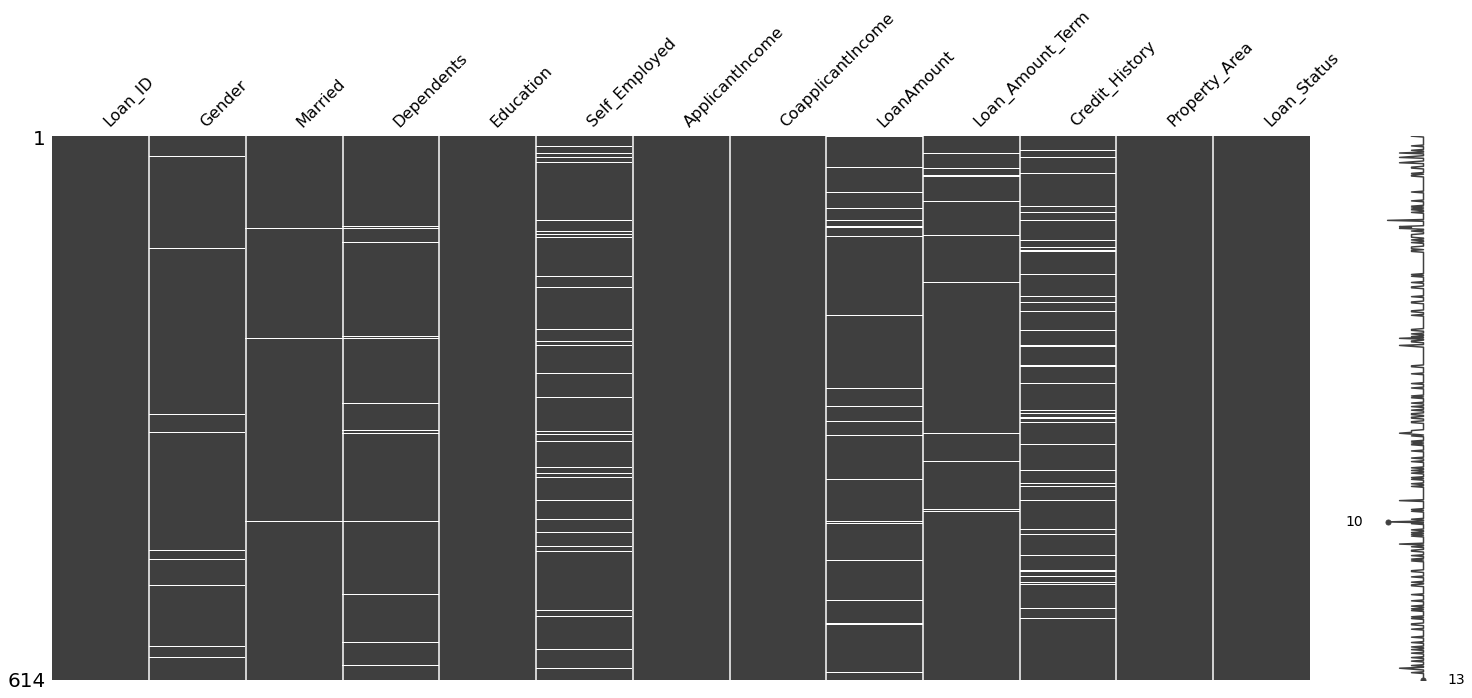

In [19]:
import missingno as mn
mn.matrix(train_df)

+ Sekilas dari pengamatan matrix di atas terbukti bahwa dataset memiliki banyak nilai yang hilang. 
+ Mari kita periksa untuk setiap kolom ada berapa baris dan berapa % nilai yang hilang

In [20]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# % null value in each column
round(train_df.isnull().sum()/train_df.shape[0]*100.00,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

+ Ada beberapa nilai yang hilang dalam fitur 
    + Gender, 
    + Married, 
    + Dependents, 
    + Self_Employed, 
    + LoanAmount, 
    + Loan_Amount_Term, dan 
    + Credit_History.

+ Kami akan memperlakukan nilai yang hilang di semua fitur satu per satu.

+ Kami dapat mempertimbangkan metode ini untuk mengisi nilai yang hilang:

+ Untuk variabel numerik: imputasi menggunakan mean atau median

+ Untuk variabel kategori: imputasi menggunakan mode

+ Ada sebagian kecil/sedikit nilai yang hilang dalam fitur Gender, Married, Dependents, Credit_History dan Self_Employed sehingga kami dapat mengisinya menggunakan mode fitur.

In [22]:
# Fill missing values in the categorical variable using mode function.

train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True) 

train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True) 

train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True) 

train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True) 

train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

+ Sekarang mari kita coba mencari cara untuk mengisi nilai yang hilang di Loan_Amount_Term. Kami akan melihat jumlah nilai variabel jangka waktu Pinjaman

In [23]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

+ Dapat dilihat bahwa pada variabel jangka waktu jumlah pinjaman, nilai 360 adalah yang paling berulang. Jadi kami akan mengganti nilai yang hilang dalam variabel ini menggunakan mode variabel ini.


+ Sekarang kita akan melihat variabel LoanAmount. Karena ini adalah variabel numerik, kita dapat menggunakan mean atau median untuk menghitung nilai yang hilang. Kami akan menggunakan median untuk mengisi nilai nol karena sebelumnya kami melihat bahwa jumlah pinjaman memiliki outlier sehingga mean tidak akan menjadi pendekatan yang tepat karena sangat dipengaruhi oleh keberadaan outlier.

In [24]:
# Use mode function to fill the missing value in Loan_Amount_Term.

train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [25]:
# Print mean and median value of LoanAmount.

print(train_df['LoanAmount'].mean())
print(train_df['LoanAmount'].median())

146.41216216216216
128.0


In [26]:
# The median value is smaller as compared to mean value in LoanAmount variable.

train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [27]:
train_df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

+ Sekarang tidak ada nilai yang hilang dalam dataset train_df.
+ Ikuti prosedur yang sama untuk dataset test_df.

### 6.2 View Null Value on Test_dataset

<AxesSubplot:>

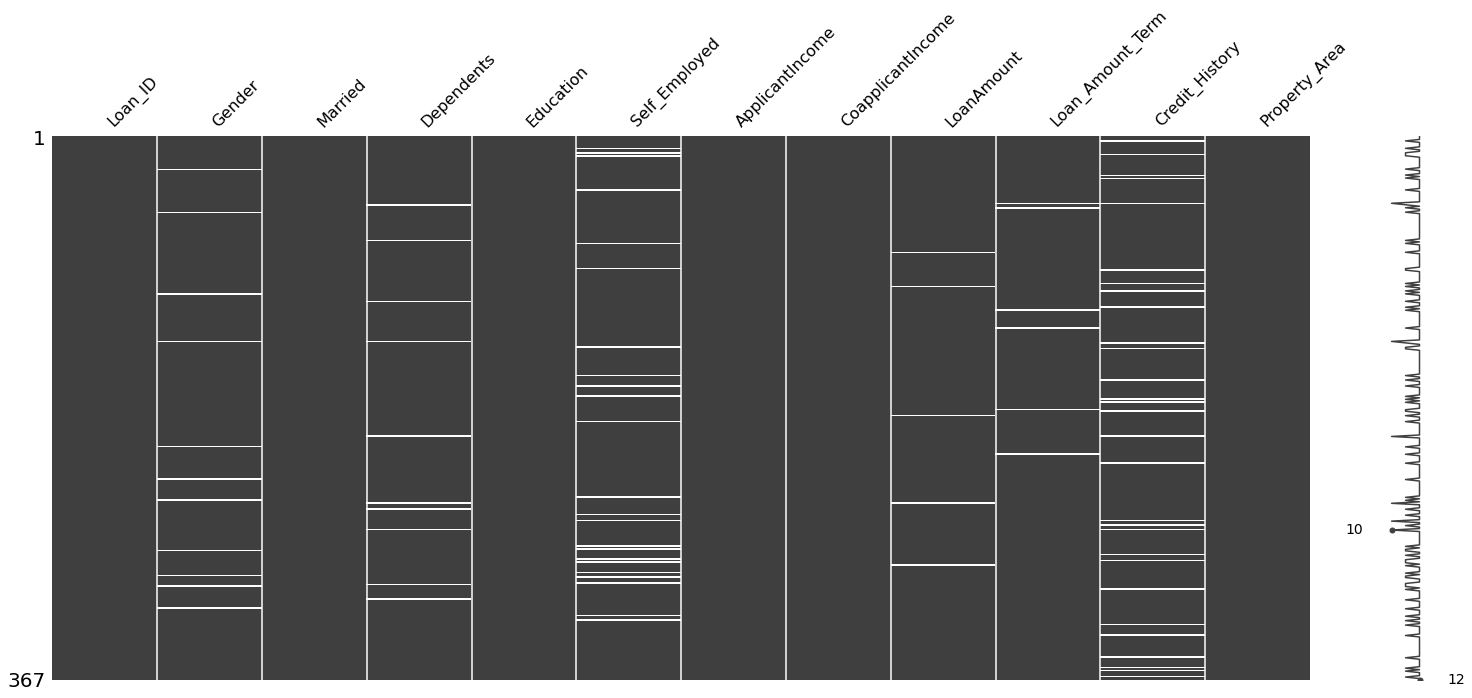

In [29]:
mn.matrix(test_df)

In [28]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
# % null value in each column
round(test_df.isnull().sum()/test_df.shape[0]*100.00,2)

Loan_ID              0.00
Gender               3.00
Married              0.00
Dependents           2.72
Education            0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Property_Area        0.00
dtype: float64

+ Hal yang sama seperti langkah di atas  diketahui ada beberapa nilai yang hilang dalam fitur test dataset diantyaranya: 
    + Gender,  
    + Dependents, 
    + Self_Employed, 
    + LoanAmount, 
    + Loan_Amount_Term, dan 
    + Credit_History.

+ Kami akan memperlakukan nilai yang hilang di semua fitur satu per satu.

+ Kami dapat mempertimbangkan metode ini untuk mengisi nilai yang hilang:

+ Untuk variabel numerik: imputasi menggunakan mean atau median

+ Untuk variabel kategori: imputasi menggunakan mode

+ Ada sebagian kecil/sedikit nilai yang hilang dalam fitur Gender,Dependents, Credit_History dan Self_Employed sehingga kami dapat mengisinya menggunakan mode fitur.

In [31]:
# Fill missing values in the test_df dataset.

test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True) 

test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True) 

test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True) 

test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)

test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

In [32]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

+ Tidak ada nilai yang hilang dalam kumpulan data test_df.

# 7.Data Visualization

+ Analisis setiap variabel kategori menggunakan tabel frekuensi.
+ Gunakan grafik batang untuk memvisualisasikan jumlah fitur kategoris.
+ Gunakan bagan kepadatan probabilitas untuk memahami distribusi fitur numerik.

In [33]:
################# - Setting Parameter - #####################
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'small',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'small',
          'axes.titlesize':'small',
          'xtick.labelsize':'small',
          'ytick.labelsize':'small'}

plt.rcParams.update(params)

In [34]:
# Visualize Target Variable ['Loan_Status']

train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

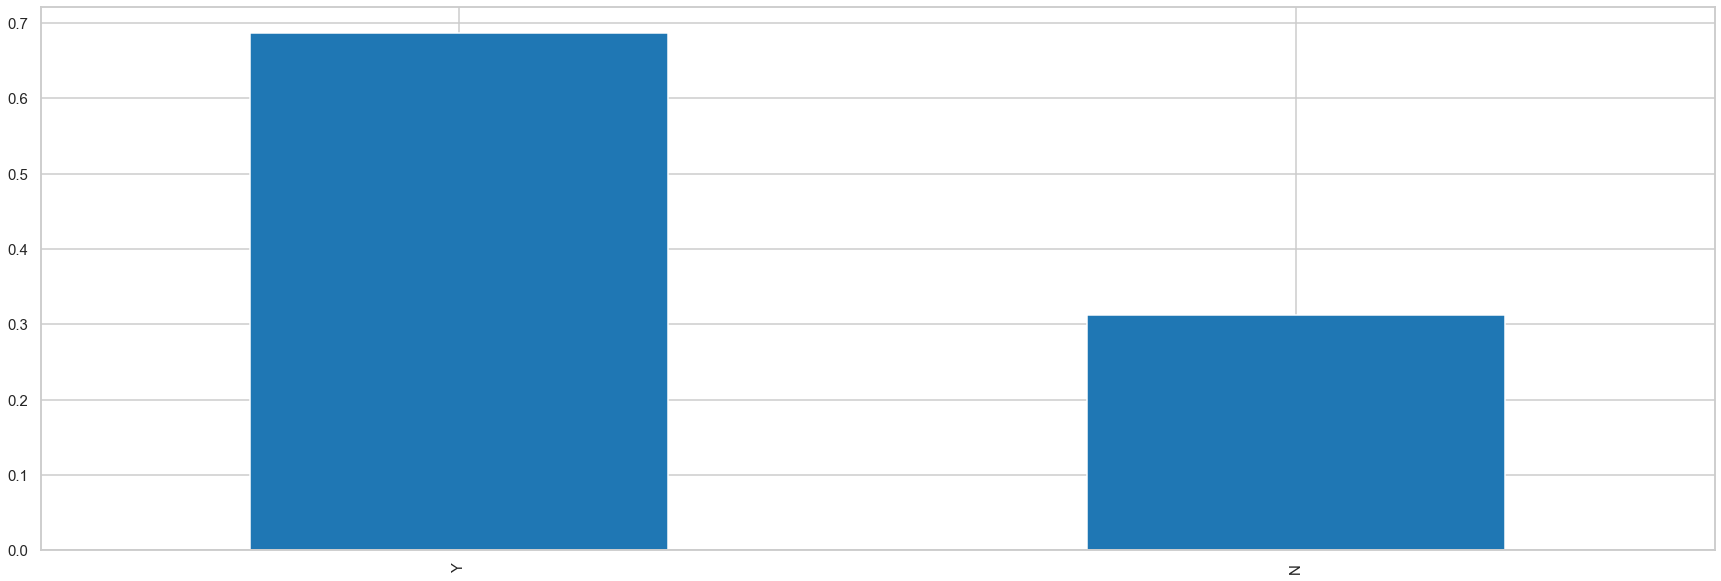

In [35]:
train_df['Loan_Status'].value_counts(normalize=True).plot.bar()

+ Pinjaman dari 69% pemohon yaitu 422 pemohon dari 614 disetujui.

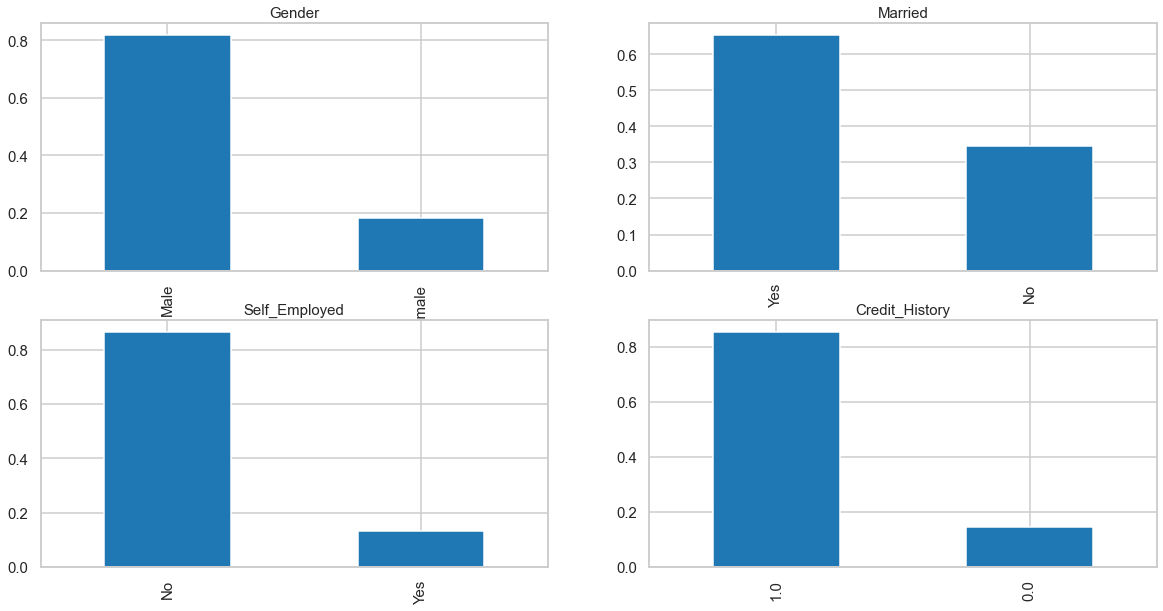

In [36]:
# Visualize Independent Variable (Categorical)

plt.figure(figsize = (20,10))

plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Gender')

plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()


+ Dari variabel Kategoris di atas kita dapat menyimpulkan bahwa.

    + 80% pelamar dalam set data train_df adalah laki-laki.
    + 65% pelamar di dataset train_df sudah menikah.
    + Sekitar 85% pelamar dalam kumpulan data train_df tidak bekerja sendiri.
    + Sekitar 85% pelamar dalam kumpulan data train_df memiliki nilai kredit positif.

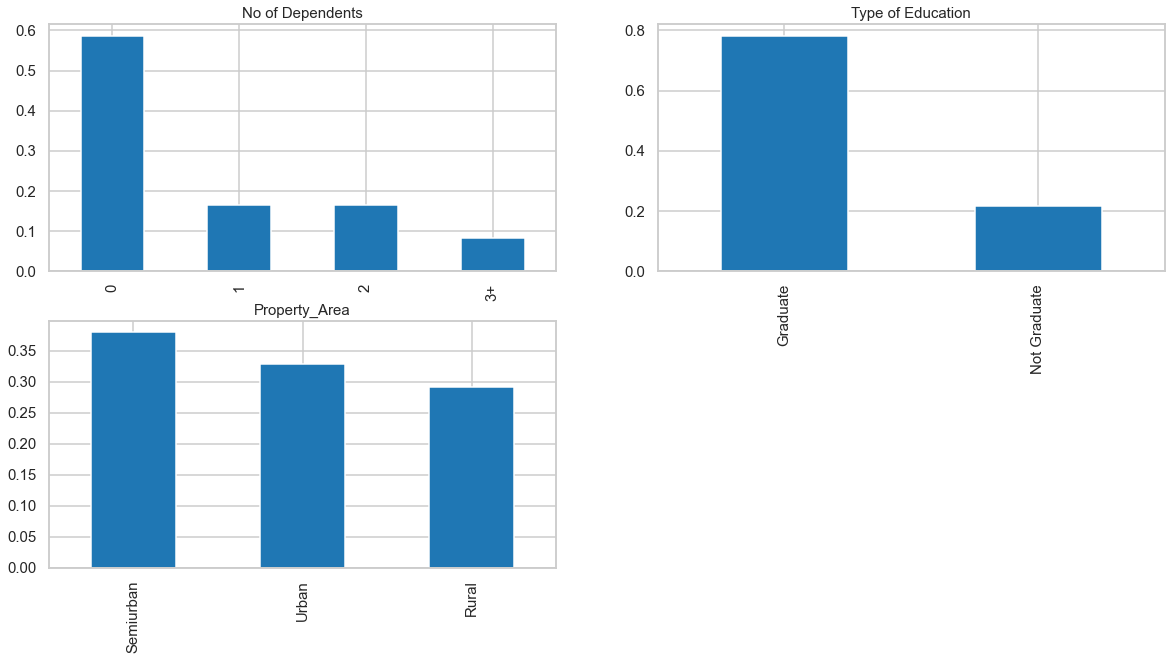

In [37]:
# Visualize Independent Variable (Ordinal)

plt.figure(figsize = (20,10))

plt.subplot(221)
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'No of Dependents')

plt.subplot(222)
train_df['Education'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Type of Education')

plt.subplot(223)
train_df['Property_Area'].value_counts(normalize=True).plot.bar(figsize= (20,10), title = 'Property_Area')

plt.show()

Kita dapat menyimpulkan dari diagram batang di atas

    + Sebagian besar pelamar di dataset train_df tidak memiliki tanggungan.
    + Sekitar 75% pelamar dalam kumpulan data train_df adalah Lulusan.
    + Sebagian besar pelamar berasal dari semiurban.

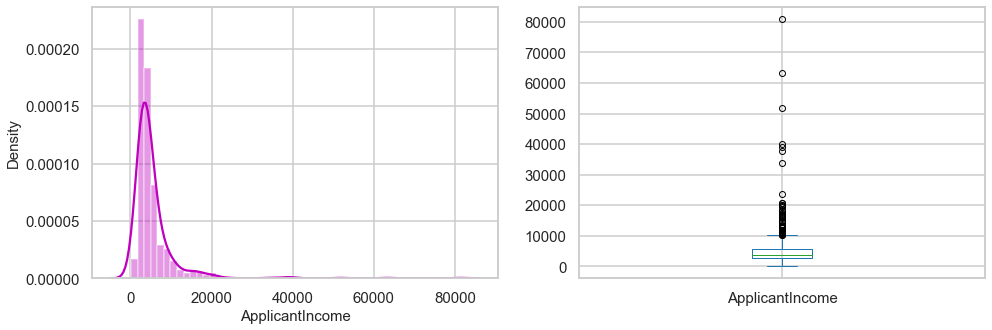

In [38]:
# Visualization of ApplicantIncome Variable (Numerical)

plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(train_df['ApplicantIncome'],color="m", ) 

plt.subplot(122) 
train_df['ApplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

In [39]:
print('Mean value of ApplicantIncome is  :',train_df['ApplicantIncome'].mean())
print('Median value of ApplicantIncome is  :',train_df['ApplicantIncome'].median())

Mean value of ApplicantIncome is  : 5403.459283387622
Median value of ApplicantIncome is  : 3812.5


Kesimpulan:

+ Distribusi pendapatan pemohon miring ke kanan dan nilai rata-rata (5403.459283) lebih besar dari nilai median (3812.500000).
+ Plot kotak menjelaskan sebagian besar kisaran pendapatan pelamar di bawah 30.000 dan ini menunjukkan keberadaan outlier yang ekstrim dalam data.

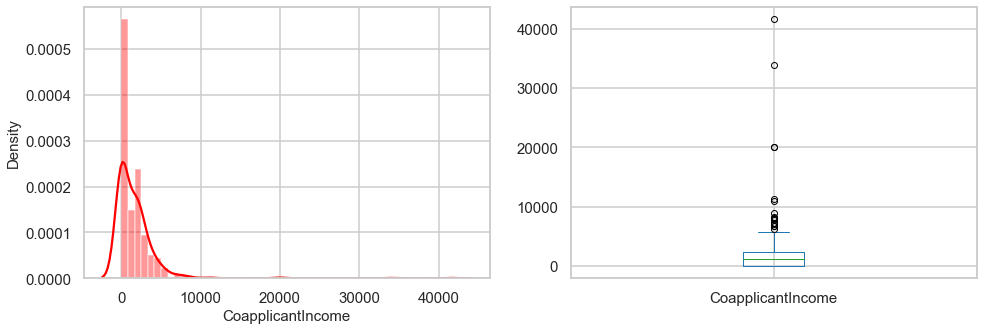

In [40]:
# Visualization of CoapplicantIncome Variable (Numerical)

plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(train_df['CoapplicantIncome'],color="r", ) 

plt.subplot(122) 
train_df['CoapplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

+ Distribusi Pendapatan Pemohon mengikuti jenis distribusi Pendapatan Pemohon yang sama.
+ Sebagian besar Penghasilan Pemohon berkisar antara o hingga 5000.
+ Plot kotak menunjukkan ouliers terjadi pada Penghasilan Pemohon.
+ Distribusi variabel Pendapatan Pemohon tidak berdistribusi normal.

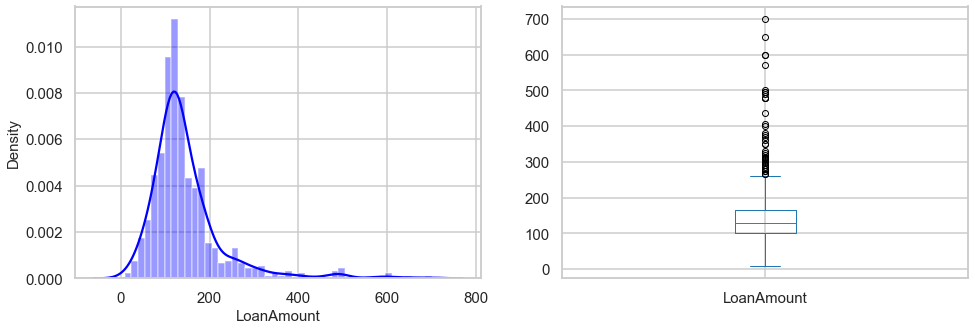

In [42]:
# Visualization of LoanAmount Variable (Numerical)

plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(train_df['LoanAmount'],color="b", ) 

plt.subplot(122) 
train_df['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()

+ Distribusi variabel LoanAmount cukup normal.
+ Box Plot menjelaskan ada outlier kuat yang ada dalam jumlah Pinjaman.
+ Karena outlier ini, sebagian besar data dalam jumlah pinjaman ada di kiri dan ekor kanan lebih panjang.
+ Salah satu cara untuk menghilangkan skewness adalah dengan melakukan transformasi log. Saat kita mengambil transformasi log, itu tidak banyak mempengaruhi nilai yang lebih kecil, tetapi mengurangi nilai yang lebih besar. Jadi, kita mendapatkan distribusi yang mirip dengan distribusi normal.

<AxesSubplot:>

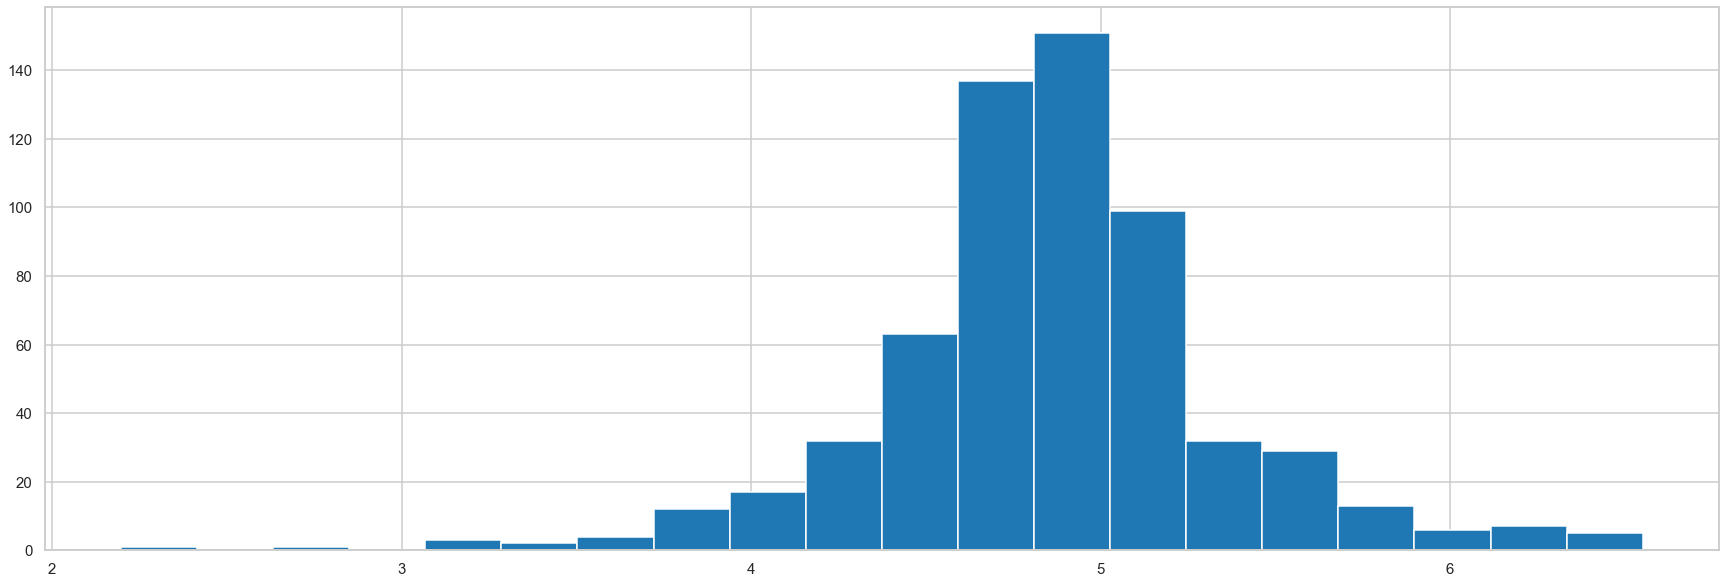

In [43]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount']) 

train_df['LoanAmount_log'].hist(bins=20) 

Sekarang distribusi terlihat lebih dekat ke normal dan efek dari nilai ekstrim telah berkurang secara signifikan
Mari kita buat transformasi log untuk test_df.

<AxesSubplot:>

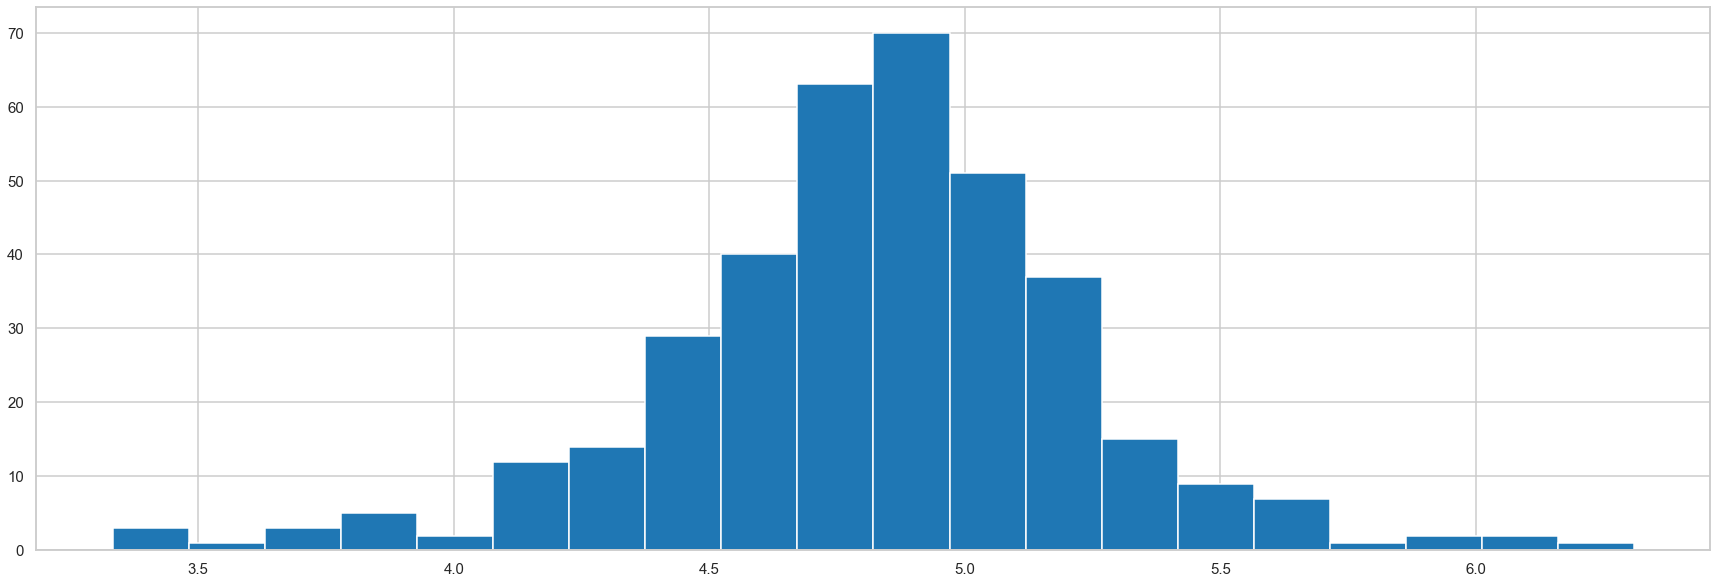

In [44]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount']) 

test_df['LoanAmount_log'].hist(bins=20) 

In [45]:
train_df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Lebih banyak pelamar memilih jangka waktu pinjaman 360 bulan.

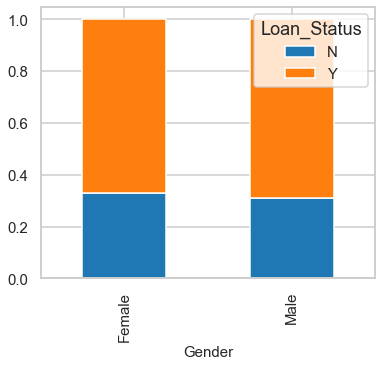

In [46]:
# Visualization of Gender Variable vs Loan_Status

Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status']) 

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))

plt.show()

Sebagian besar pelamar adalah laki-laki meskipun proporsi Pinjaman yang disetujui dan yang tidak disetujui sama untuk laki-laki dan perempuan.

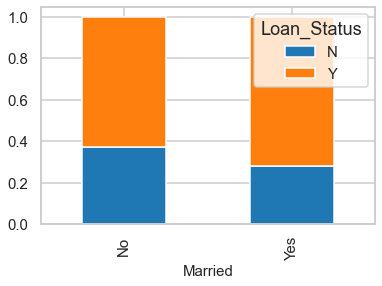

In [47]:
# Visualization of Married Variable vs Loan_Status

Married=pd.crosstab(train_df['Married'],train_df['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4)) 

plt.show()

Proporsi pelamar yang sudah menikah lebih tinggi untuk pinjaman yang disetujui.

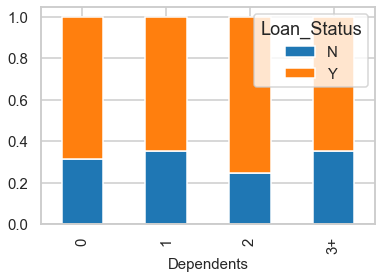

In [48]:
# Visualization of Dependents Variable vs Loan_Status

Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status']) 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(6,4))

plt.show()

+ Distribusi pelamar dengan 1 atau 3+ status pinjaman serupa.
+ Pemohon dengan 2 tanggungan memiliki persetujuan pinjaman yang lebih tinggi.

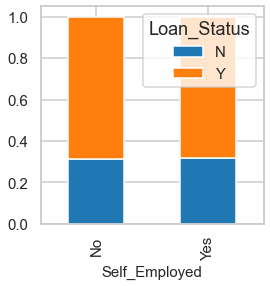

In [49]:
# Visualization of Self_Employed Variable vs Loan_Status

Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status']) 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

plt.show()

Tidak ada yang bisa kita simpulkan dari status wiraswasta vs pinjaman.

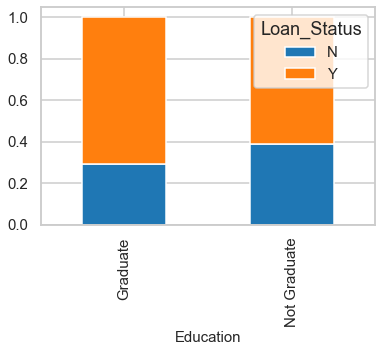

In [50]:
# Visualization of Education Variable vs Loan_Status

Education =pd.crosstab(train_df['Education'],train_df['Loan_Status']) 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

plt.show()

Sepertinya ada persetujuan yang lebih tinggi untuk pelamar Pascasarjana.

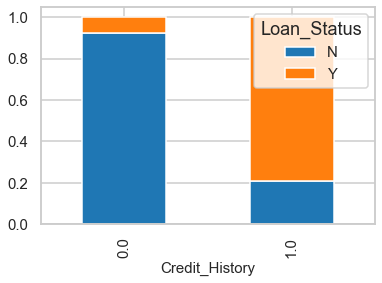

In [51]:
# Visualization of Credit_History vs Loan_Status

Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4)) 

plt.show()

Tampaknya orang-orang dengan sejarah kredit sebagai 1 lebih mungkin untuk mendapatkan pinjaman mereka disetujui.

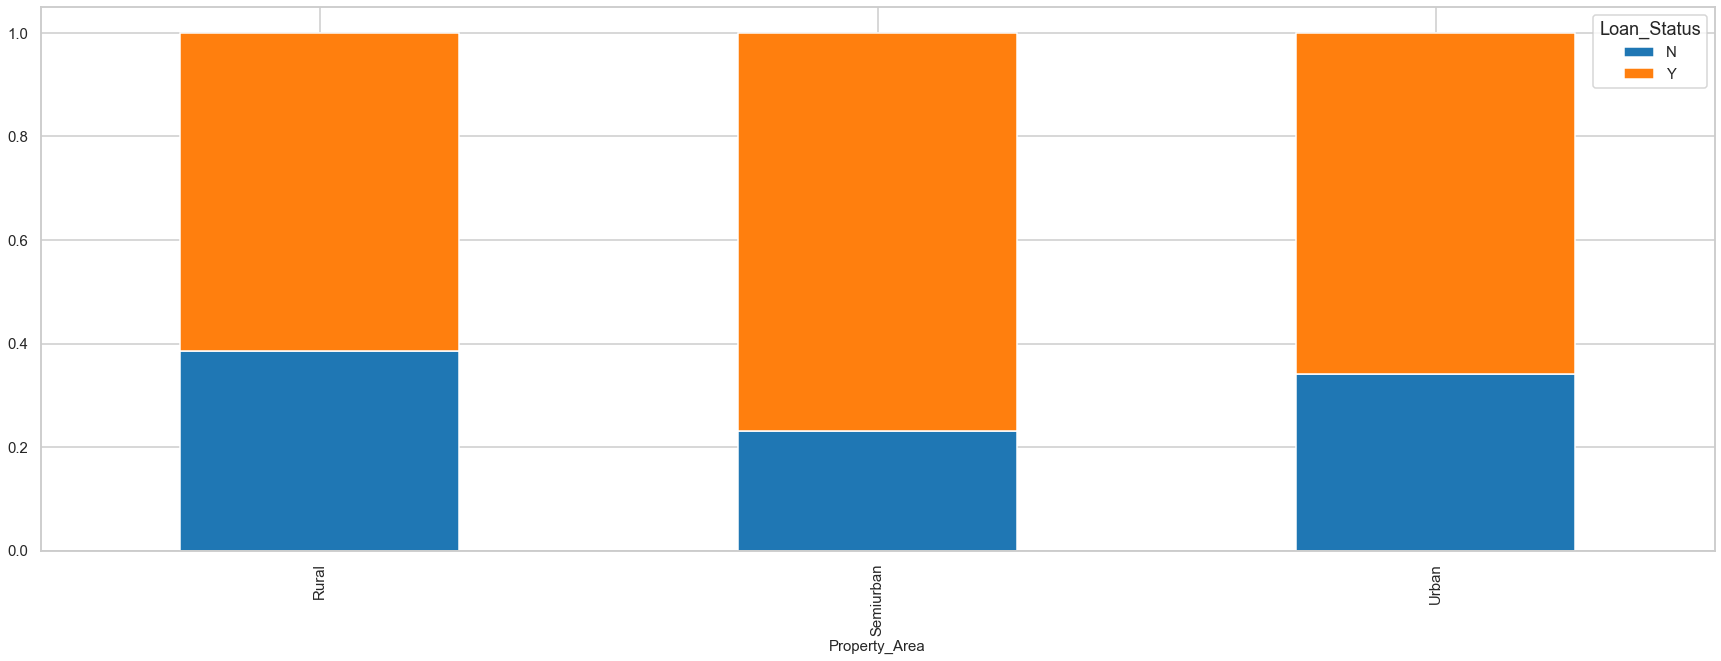

In [52]:
# Visualization of Property_Area vs Loan_Status

Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.show()

Proporsi pinjaman yang disetujui di daerah semi-perkotaan lebih tinggi dibandingkan dengan di daerah pedesaan atau perkotaan.

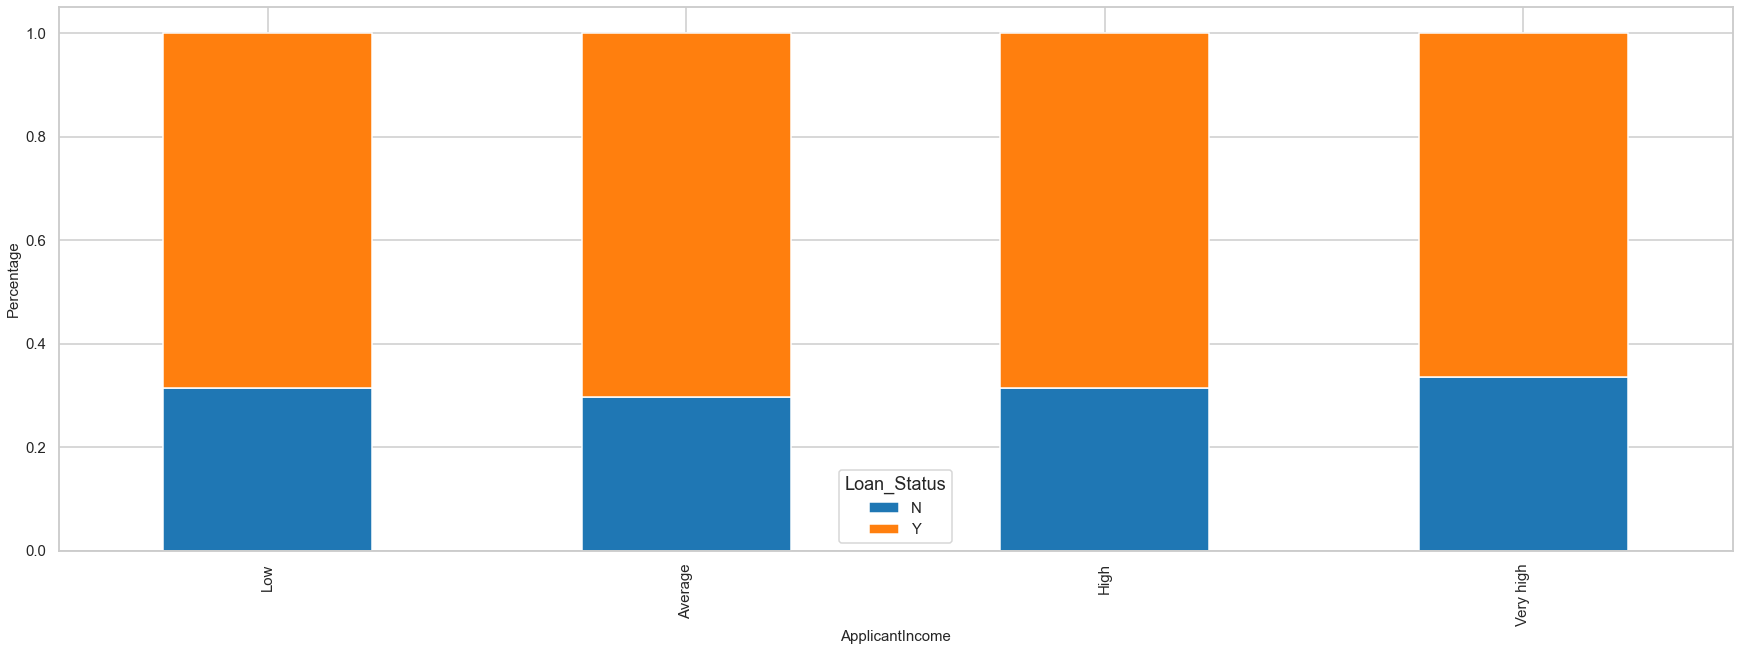

In [53]:
# Visualization of ApplicantIncome vs Loan_Status

bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high'] 

train_df['Income_bin']=pd.cut(train_df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status']) 

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('ApplicantIncome') 

P = plt.ylabel('Percentage')

Dapat disimpulkan bahwa pendapatan Pemohon tidak mempengaruhi kemungkinan persetujuan pinjaman

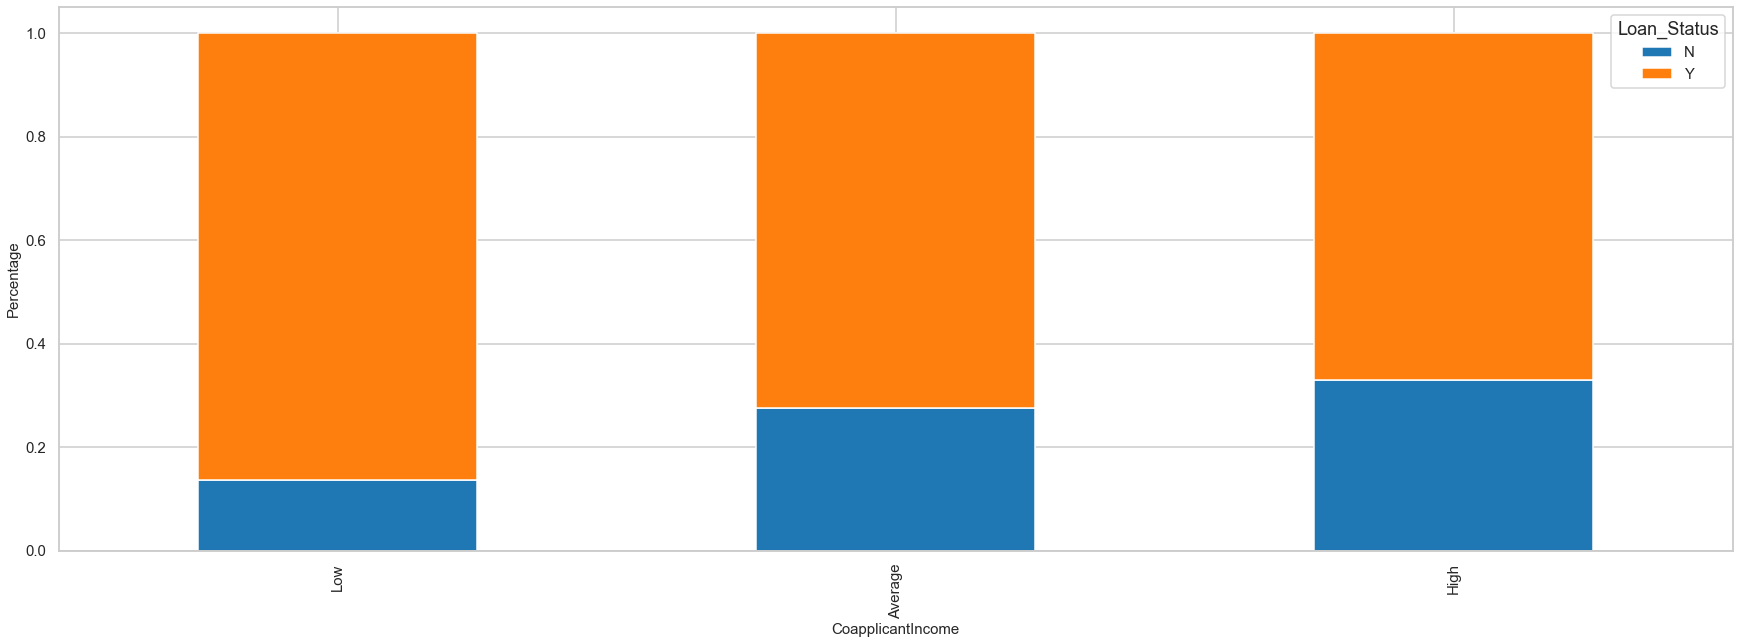

In [54]:
# Visualization of CoapplicantIncome vs Loan_Status

bins=[0,1000,3000,42000] 

group=['Low','Average','High'] 

train_df['Coapplicant_Income_bin']=pd.cut(train_df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train_df['Coapplicant_Income_bin'],train_df['Loan_Status']) 

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('CoapplicantIncome') 

P = plt.ylabel('Percentage')

+ Distribusi pendapatan Pemohon menunjukkan bahwa peluang persetujuan pinjaman yang lebih tinggi adalah pelamar yang memiliki kisaran pendapatan rendah. Tetapi ini tidak terlihat benar.

+ Alasan yang mungkin di balik ini mungkin karena sebagian besar pemohon tidak memiliki pemohon bersama sehingga pendapatan pemohon untuk pemohon tersebut adalah 0 dan karenanya persetujuan pinjaman tidak bergantung padanya. Jadi kami dapat membuat variabel baru di mana kami akan menggabungkan pendapatan pemohon dan pemohon untuk memvisualisasikan efek gabungan pendapatan pada persetujuan pinjaman.

+ Mari kita gabungkan Pendapatan Pemohon dan Pendapatan Pemohon dan lihat efek gabungan dari Pendapatan Total pada Status_Pinjaman.

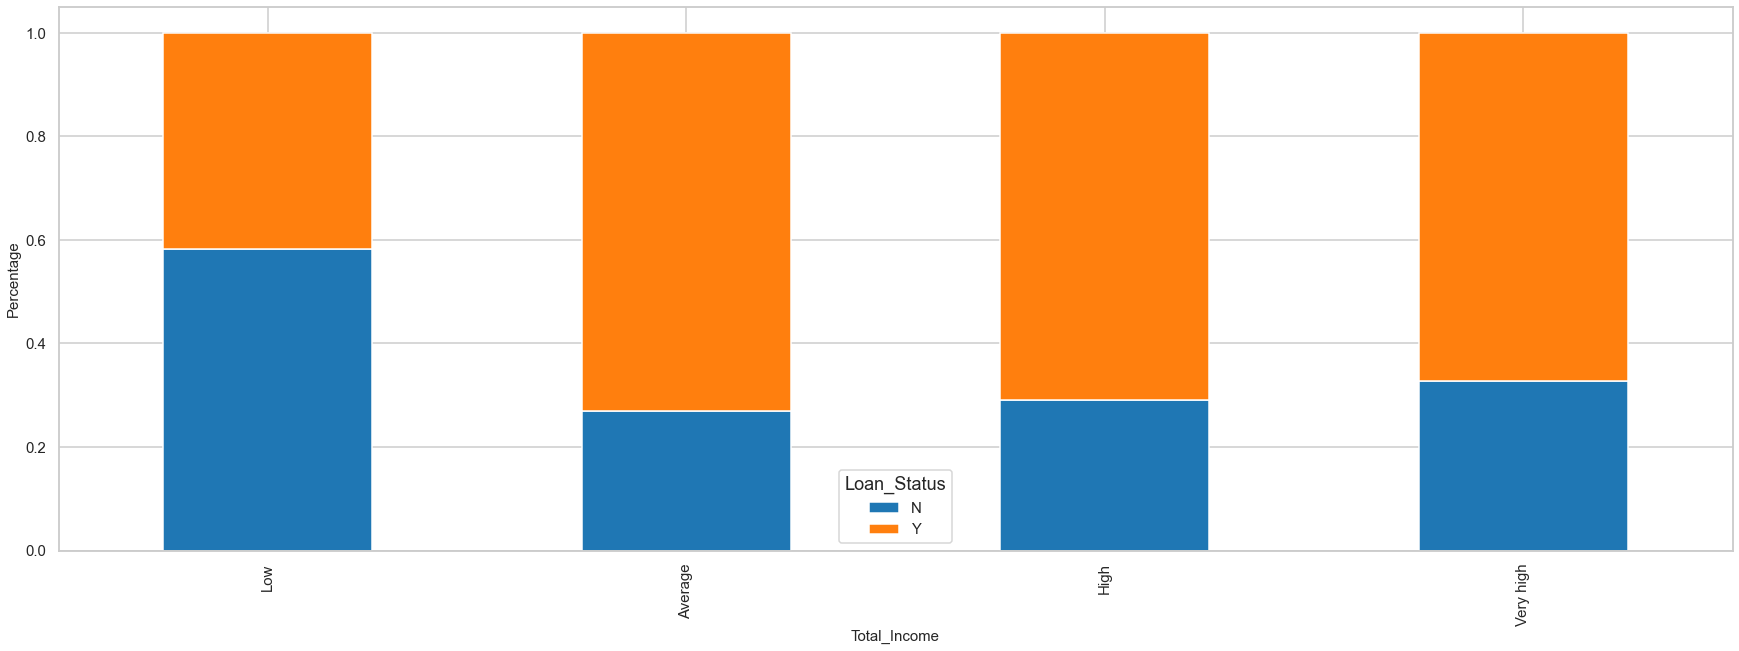

In [55]:
# Visualization of Total_Income vs Loan_Status

train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high'] 

train_df['Total_Income_bin']=pd.cut(train_df['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train_df['Total_Income_bin'],train_df['Loan_Status']) 

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Total_Income') 

P = plt.ylabel('Percentage')

Kita dapat melihat bahwa Proporsi pinjaman yang disetujui untuk pemohon yang memiliki Penghasilan_Total rendah sangat sedikit dibandingkan dengan pemohon dengan Penghasilan Rata-Rata, Tinggi, dan Sangat Tinggi.

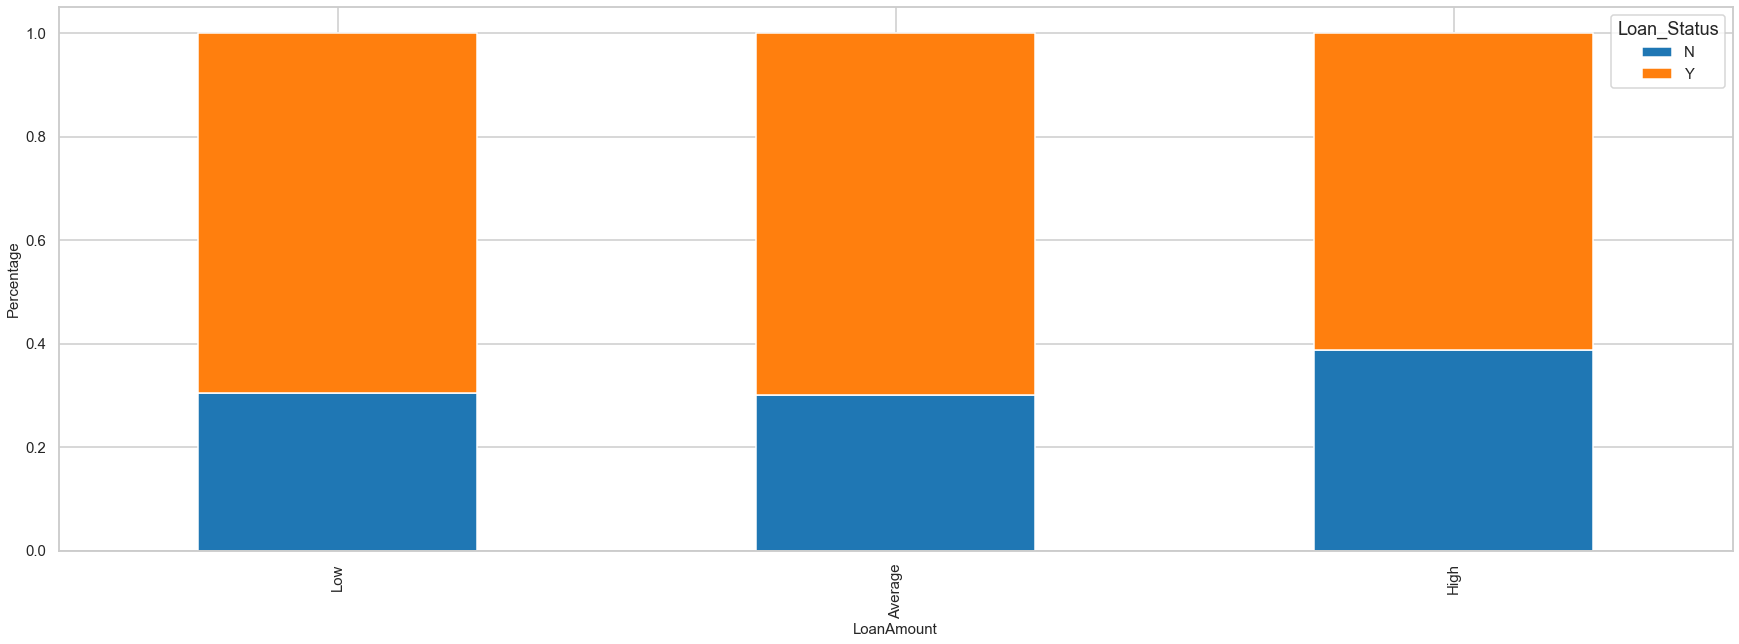

In [56]:
# Visualization of LoanAmount vs Loan_Status

bins=[0,100,200,700] 

group=['Low','Average','High'] 

train_df['LoanAmount_bin']=pd.cut(train_df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train_df['LoanAmount_bin'],train_df['Loan_Status']) 

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('LoanAmount') 

P = plt.ylabel('Percentage')

Dapat dilihat bahwa proporsi pinjaman yang disetujui lebih tinggi untuk Jumlah Pinjaman Rendah dan Rata-rata dibandingkan dengan Jumlah Pinjaman Tinggi.

In [57]:
#Lets drop the variables (Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income') in the train_df

train_df=train_df.drop([ 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [58]:
train_df['Dependents'].replace('3+', 3,inplace=True)  #Replace Dependents (3+ as 3)
 
train_df['Loan_Status'].replace('N', 0,inplace=True)  #Replace Loan Status (N as 0)

train_df['Loan_Status'].replace('Y', 1,inplace=True)  ##Replace Loan Status (Y as 1)

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,High


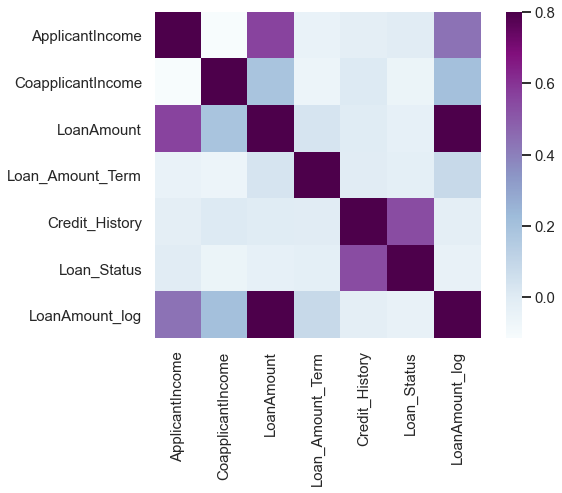

In [59]:
# Lets visualize the correlation of variables using heatmap

matrix = train_df.corr()

ax = plt.subplots(figsize=(9, 6)) 

sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

+ Kami melihat bahwa variabel yang paling berkorelasi adalah:
    + (ApplicantIncome - LoanAmount), 
    + (ApplicantIncome - LoanAmount_log) 
    + (Credit_History - Loan_Status) dan 
    + LoanAmount juga berkorelasi dengan CoapplicantIncome.

# 8.Model Building

+ Mari kita buat model pertama kita untuk memprediksi variabel target. Kita akan mulai dengan Regresi Logistik yang digunakan untuk memprediksi hasil biner.

    + Regresi Logistik adalah algoritma klasifikasi. 
        + Ini digunakan untuk memprediksi hasil biner (1 / 0, Ya / Tidak, Benar / Salah) diberikan satu set variabel independen.

    + Regresi logistik merupakan estimasi dari fungsi Logit. 
        + Fungsi logit hanyalah log peluang yang mendukung acara tersebut.
        
        + Fungsi ini membuat kurva berbentuk s dengan perkiraan probabilitas, yang sangat mirip dengan fungsi langkah pengambilan keputuisan yang diperlukan

In [60]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,High


Mari kita lepaskan variabel Loan_ID karena tidak berpengaruh pada status pinjaman. Kami akan melakukan perubahan yang sama pada dataset uji yang kami lakukan untuk dataset pelatihan.

In [61]:
train_lgr=train_df.drop(['Loan_ID','Income_bin'],axis=1) 

X = train_lgr.drop('Loan_Status',1)
y = train_lgr.Loan_Status

X = pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


+ Kami akan menggunakan scikit-learn (sklearn) untuk membuat model yang berbeda yang merupakan perpustakaan open source untuk Python.


+ Sklearn membutuhkan variabel target dalam kumpulan data terpisah. Jadi, kami akan menghapus variabel target kami dari dataset kereta dan menyimpannya di dataset lain.

In [62]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [63]:
print(X.shape)
print(y.shape)

(614, 21)
(614,)


In [64]:
# Use  train_test_split function from sklearn to divide our train dataset.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=1)

In [65]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(491, 21)
(491,)
(123, 21)
(123,)


Dataset telah dibagi menjadi pelatihan(x_train ,y_train) dan bagian validasi(x_mv ,y_mv).

In [66]:
#Import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score

model_log = LogisticRegression(random_state=1)

model_log.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_lgr = model_log.predict(x_test)

acc_log = accuracy_score(y_test,pred_lgr)*100 

acc_log

80.48780487804879

Model menunjukkan akurasi prediksi 80%. Kami telah mengidentifikasi 80% status pinjaman dengan benar.

In [67]:
#Predict the test file using Log Regression Model

test_lr=test_df.drop('Loan_ID',axis=1)

test_lgr=pd.get_dummies(test_lr)

test_lgr.shape

pred_test_lr = model_log.predict(test_lgr)

In [68]:
#Final Submission

submission['Loan_Status'] = pred_test_lr 

submission['Loan_ID']     = test_df['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True)

submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [69]:
from sklearn.svm import SVC

model_svc=  SVC(gamma='auto')

model_svc.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_svc = model_svc.predict(x_test)

acc_svc = accuracy_score(y_test,pred_svc)*100

acc_svc

68.29268292682927

In [70]:
from sklearn.neighbors import KNeighborsClassifier

model_knn= KNeighborsClassifier(n_neighbors = 3)

model_knn.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_knn = model_knn.predict(x_test)

acc_knn = accuracy_score(y_test,pred_knn)*100

acc_knn

59.34959349593496

In [71]:
from sklearn.ensemble import RandomForestClassifier

model_rfc= RandomForestClassifier(n_estimators=100,random_state = 1)

model_rfc.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_rfc = model_rfc.predict(x_test)

acc_rfc = accuracy_score(y_test,pred_rfc)*100

acc_rfc

77.23577235772358

In [72]:
from sklearn.naive_bayes import GaussianNB

model_gnb= GaussianNB()

model_gnb.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_gnb = model_gnb.predict(x_test)

acc_gnb = accuracy_score(y_test,pred_gnb)*100

acc_gnb

79.67479674796748

In [73]:
from sklearn.linear_model import Perceptron

model_ptn= Perceptron()

model_ptn.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_ptn = model_ptn.predict(x_test)

acc_ptn = accuracy_score(y_test,pred_ptn)*100

acc_ptn

68.29268292682927

In [74]:
from sklearn.tree import DecisionTreeClassifier

model_dtc= DecisionTreeClassifier(random_state=1)

model_dtc.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_dtc = model_dtc.predict(x_test)

acc_dtc = accuracy_score(y_test,pred_dtc)*100

acc_dtc

77.23577235772358

In [75]:
import lightgbm as lgb

model_lgb=lgb.LGBMClassifier()

model_lgb.fit(x_train, y_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_lgb = model_lgb.predict(x_test)

acc_lgb = accuracy_score(y_test,pred_lgb)*100

acc_lgb

76.42276422764228

In [76]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree','LGBMClassifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rfc, acc_gnb, acc_ptn, 
             acc_dtc,acc_lgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,80.487805
4,Naive Bayes,79.674797
3,Random Forest,77.235772
6,Decision Tree,77.235772
7,LGBMClassifier,76.422764
0,Support Vector Machines,68.292683
5,Perceptron,68.292683
1,KNN,59.349593


Model Regresi Logistik menunjukkan skor akurasi tertinggi 80.48. Jadi saya menggunakan model yang sama untuk memprediksi dataset test_df dan menjalankan file pengiriman.

# 9.Feature Engineering

Rekayasa Fitur digunakan untuk mengidentifikasi fitur yang tepat untuk variabel target guna meningkatkan akurasi prediksi.

In [77]:
#Adding total income by combining applicant's income and coapplicant's income

train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome'] 

test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [78]:
# Drop  Loan_Id,Income_bin and LoanAmount_log variables in train_fe 

train_fe = train_df.drop(['Loan_ID','Income_bin','LoanAmount_log'],axis=1)

# Drop  Loan_Id and LoanAmount_log variables in test_fe 

test_fe  = test_df.drop(['Loan_ID','LoanAmount_log'],axis=1)

In [79]:
train_fe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [80]:
#Convert Dependent Column into numeric feature

train_fe = train_fe.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)

test_fe = test_fe.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)


In [81]:
# process column, apply LabelEncoder to categorical features

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

lbl.fit(list(train_fe["Dependents"].values))

train_fe["Dependents"] = lbl.transform(list(train_fe["Dependents"].values))

lbl.fit(list(test_fe["Dependents"].values))

test_fe["Dependents"] = lbl.transform(list(test_fe["Dependents"].values))

# shape 

print('Shape all_data: {}'.format(train_fe.shape))

print('Shape all_data: {}'.format(test_fe.shape))

Shape all_data: (614, 13)
Shape all_data: (367, 12)


In [82]:
train_fe = pd.get_dummies(train_fe)

test_fe = pd.get_dummies(test_fe)

train_fe.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,5849.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,1,1,0,1,0,1,0,0,0,1


In [83]:
test_fe.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,5720,0,1,0,1,1,0,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,4576,0,1,0,1,1,0,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,6800,0,1,0,1,1,0,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,4886,0,1,0,1,1,0,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,3276,0,1,1,0,0,1,1,0,0,0,1


In [84]:
train_fe.shape,test_fe.shape

((614, 19), (367, 18))

In [85]:
from sklearn.feature_selection import SelectKBest,f_classif

X_fe  = train_fe.drop(['Loan_Status'],axis=1)

y_fe  = train_fe.Loan_Status

selector = SelectKBest(f_classif, k=6)

X_new = selector.fit_transform(X_fe, y_fe)

print(X_new)

X_new.shape

[[1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0.]
 ...
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1.]]


(614, 6)

In [86]:
# Get back the features we've kept, zero out all other features

selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X_fe.index, 
                                 columns=X_fe.columns)
selected_features.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Dropped columns have values of all 0s, so var is 0, drop them

selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the dataset with the selected features.

X_fe[selected_columns].head()

,Credit_History,Married_No,Married_Yes,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,1.0,1,0,1,0,0
1,1.0,0,1,1,1,0
2,1.0,0,1,1,0,0
3,1.0,0,1,0,0,0
4,1.0,1,0,1,0,0


In [88]:
from sklearn.model_selection import train_test_split

xf_train, xf_test, yf_train, yf_test = train_test_split(X_fe[selected_columns],y_fe, test_size =0.2,random_state=1)

xf_train.shape,xf_test.shape,yf_train.shape,yf_test.shape

((491, 6), (123, 6), (491,), (123,))

In [89]:
#Import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score

model_log1 = LogisticRegression(random_state=1)

model_log1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

yf_pred = model_log1.predict(xf_test)

acc_log1 = accuracy_score(yf_test,yf_pred )*100 

acc_log1

80.48780487804879

In [90]:
#Support Vector Classifier

from sklearn.svm import SVC

model_svc1=  SVC(gamma='auto')

model_svc1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_svc1 = model_svc1.predict(xf_test)

acc_svc1 = accuracy_score(yf_test,pred_svc1)*100

acc_svc1

80.48780487804879

In [91]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn1= KNeighborsClassifier(n_neighbors = 3)

model_knn1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_knn1 = model_knn1.predict(xf_test)

acc_knn1 = accuracy_score(yf_test,pred_knn1)*100

acc_knn1

80.48780487804879

In [92]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc1= RandomForestClassifier(n_estimators=100,random_state = 1)

model_rfc1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_rfc1 = model_rfc1.predict(xf_test)

acc_rfc1 = accuracy_score(yf_test,pred_rfc1)*100

acc_rfc1

80.48780487804879

In [93]:
#Gaussian NB

from sklearn.naive_bayes import GaussianNB

model_gnb1= GaussianNB()

model_gnb1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_gnb1 = model_gnb1.predict(xf_test)

acc_gnb1 = accuracy_score(yf_test,pred_gnb1)*100

acc_gnb1

80.48780487804879

In [94]:
#Perceptron

from sklearn.linear_model import Perceptron

model_ptn1= Perceptron()

model_ptn1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_ptn1 = model_ptn1.predict(xf_test)

acc_ptn1 = accuracy_score(yf_test,pred_ptn1)*100

acc_ptn1

82.11382113821138

In [95]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dtc1= DecisionTreeClassifier(random_state=1)

model_dtc1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_dtc1 = model_dtc1.predict(xf_test)

acc_dtc1 = accuracy_score(yf_test,pred_dtc1)*100

acc_dtc1

80.48780487804879

In [96]:
#Lightgbm Classifier

import lightgbm as lgb

model_lgb1=lgb.LGBMClassifier()

model_lgb1.fit(xf_train, yf_train)

# Use Prdict method to predict the loan status and calculate accuracy score in the validation set.

pred_lgb1 = model_lgb1.predict(xf_test)

acc_lgb1 = accuracy_score(yf_test,pred_lgb1)*100

acc_lgb1

80.48780487804879

In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree','LGBMClassifier'],
    'Score': [acc_svc1, acc_knn1, acc_log1, 
              acc_rfc1, acc_gnb1, acc_ptn1, 
             acc_dtc1,acc_lgb1]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Perceptron,82.113821
0,Support Vector Machines,80.487805
1,KNN,80.487805
2,Logistic Regression,80.487805
3,Random Forest,80.487805
4,Naive Bayes,80.487805
6,Decision Tree,80.487805
7,LGBMClassifier,80.487805


In [98]:
test_ptn = test_fe[selected_columns] 

test_ptn.head()

,Credit_History,Married_No,Married_Yes,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,1.0,0,1,1,0,0
1,1.0,0,1,1,0,0
2,1.0,0,1,1,0,0
3,1.0,0,1,1,0,0
4,1.0,1,0,0,0,0


In [99]:
#Final Submission

pred_ptn = model_ptn1.predict(test_ptn)

submission['Loan_Status'] = pred_ptn

submission['Loan_ID']     = test_df['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True)

submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('perceptron.csv')

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


# 10.Cross Validation

+ Validasi Silang adalah teknik yang melibatkan pemesanan sampel tertentu dari kumpulan data yang modelnya tidak Anda latih. Kemudian, Anda menguji model Anda pada sampel ini sebelum menyelesaikannya.

+ Beberapa metode umum untuk validasi tercantum di bawah ini:

    + Pendekatan set validasi
    + validasi silang k-fold
    + Tinggalkan satu validasi silang (LOOCV)
    + Validasi silang k-fold bertingkat
    
+ Di bagian ini saya menggunakan validasi k-fold bertingkat untuk menguji dataset kami.

In [101]:
#Cross Validation using Logistic Regression

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score


skfold = StratifiedKFold (n_splits=10,shuffle=True, random_state= 1)

Log_skf = LogisticRegression()

Log_skf1 = cross_val_score(Log_skf, X_fe[selected_columns], y_fe, cv=skfold)

print(Log_skf1)

acc_log2 = Log_skf1.mean()*100.0

acc_log2 


[0.79032258 0.83870968 0.85483871 0.80645161 0.83606557 0.75409836
 0.78688525 0.83606557 0.80327869 0.78688525]


80.93601269169751

In [102]:
#Cross Validation using SVC

skfold = StratifiedKFold (n_splits=5,shuffle=True, random_state= 1)

svc_sk = SVC(gamma='auto')

svc_sk1 = cross_val_score(svc_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(svc_sk1)

acc_svc2 = svc_sk1.mean()*100.0

acc_svc2 

[0.81300813 0.83739837 0.79674797 0.80487805 0.79508197]


80.94228975076636

In [103]:
#Cross Validation using KNN

skfold = StratifiedKFold (n_splits=10,shuffle=True, random_state= 1)

knn_sk = KNeighborsClassifier(n_neighbors = 3)

knn_sk1 = cross_val_score(knn_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(knn_sk1)

acc_knn2 = knn_sk1.mean()*100.0

acc_knn2

[0.77419355 0.87096774 0.83870968 0.80645161 0.72131148 0.72131148
 0.75409836 0.81967213 0.75409836 0.73770492]


77.98519301956637

In [104]:
#Cross Validation using RandomForest Classifier

skfold = StratifiedKFold (n_splits=10,shuffle=False, random_state= None)

rfc_sk = RandomForestClassifier(n_estimators=100,random_state = 1)

rfc_sk1 = cross_val_score(rfc_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(rfc_sk1)

acc_rfc2 = rfc_sk1.mean()*100.0

acc_rfc2

[0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]


80.95716552088842

In [105]:
#Cross Validation using GaussianNB

skfold = StratifiedKFold (n_splits=5,shuffle=False, random_state= None)

gnb_sk = GaussianNB()

gnb_sk1 = cross_val_score(gnb_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(gnb_sk1)

acc_gnb2 = gnb_sk1.mean()*100.0

acc_gnb2

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]


80.9462881514061

In [106]:
#Cross Validation using Perceptron

skfold = StratifiedKFold (n_splits=5,shuffle=True, random_state= None)

ptn_sk = Perceptron()

ptn_sk1 = cross_val_score(ptn_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(ptn_sk1)

acc_ptn2 = ptn_sk1.mean()*100.0

acc_ptn2

[0.63414634 0.73170732 0.7804878  0.59349593 0.79508197]


70.69838731174197

In [107]:
#Cross Validation using DecisionTree Classifier

skfold = StratifiedKFold (n_splits=5,shuffle=True, random_state= None)

dt_sk = DecisionTreeClassifier(random_state=1)

dt_sk1 = cross_val_score(dt_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(dt_sk1)

acc_dt2 = dt_sk1.mean()*100.0

acc_dt2

[0.83739837 0.81300813 0.79674797 0.76422764 0.83606557]


80.94895375183259

In [108]:
#Cross Validation using LGBMClassifier

skfold = StratifiedKFold (n_splits=10,shuffle=True, random_state= None)

lgb_sk = lgb.LGBMClassifier()

lgb_sk1 = cross_val_score(lgb_sk, X_fe[selected_columns], y_fe, cv=skfold)

print(lgb_sk1)

acc_lgb2 = lgb_sk1.mean()*100.0

acc_lgb2

[0.80645161 0.80645161 0.80645161 0.72580645 0.81967213 0.8852459
 0.80327869 0.83606557 0.75409836 0.85245902]


80.95980962453729

In [109]:
#Model Validation

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree','LGBMClassifier'],
    'Mean Accuracy': [acc_svc2, acc_knn2, acc_log2, 
              acc_rfc2, acc_gnb2, acc_ptn2, 
             acc_dt2,acc_lgb2]})
models.sort_values(by='Mean Accuracy', ascending=False)

,Model,Mean Accuracy
7,LGBMClassifier,80.959810
3,Random Forest,80.957166
6,Decision Tree,80.948954
4,Naive Bayes,80.946288
0,Support Vector Machines,80.942290
2,Logistic Regression,80.936013
1,KNN,77.985193
5,Perceptron,70.698387


Ringkasan:

Random Forest,LGBMClassifier dan Naive Bayes adalah 3 model teratas dalam skor akurasi rata-rata.